In [12]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from sklearn.cluster import KMeans
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [13]:
def load_data():
    csv_path ="./train-set.csv"
    return pd.read_csv(csv_path)

In [14]:
pd.options.display.float_format = '{:,.0f}'.format

df = load_data() # "housing" is a pandas DataFrame object containing all the data
df.head() # Display the top five rows of the DataFrame
#Q1 How many attribuites in the data set? Desribe the attribuites .

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,Male,No,22,No,Healthcare,1,Low,4,Category 4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3,Category 4,A
2,466315,Female,Yes,67,Yes,Engineer,1,Low,1,Category 6,B
3,461735,Male,Yes,67,Yes,Lawyer,0,High,2,Category 6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6,Category 6,A


In [4]:
df['SpendingScore'].value_counts()

Low        4878
Average    1974
High       1216
Name: SpendingScore, dtype: int64

In [5]:
df['Category'].value_counts()

Category 6    5238
Category 4    1089
Category 3     822
Category 2     422
Category 7     203
Category 1     133
Category 5      85
Name: Category, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      8068 non-null   int64  
 1   Gender          8068 non-null   object 
 2   Married         7928 non-null   object 
 3   Age             8068 non-null   int64  
 4   Graduated       7990 non-null   object 
 5   Profession      7944 non-null   object 
 6   WorkExperience  7239 non-null   float64
 7   SpendingScore   8068 non-null   object 
 8   FamilySize      7733 non-null   float64
 9   Category        7992 non-null   object 
 10  Segmentation    8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
dictionary_SpendingScore=[{'col':'SpendingScore','mapping':{'Low':1,'Average':2,'High':3}}]
encoder=ce.OrdinalEncoder(cols='SpendingScore',mapping=dictionary_SpendingScore)

x_train_encoded =encoder.fit_transform(df)

dictionary_Category=[{'col':'Category','mapping':{'Category 1':1,'Category 2':2,'Category 3':3,'Category 4':4,'Category 5':5,'Category 6':6,'Category 7':7}}]
encoder=ce.OrdinalEncoder(cols='Category',mapping=dictionary_Category)

x_train_encoded =encoder.fit_transform(x_train_encoded)

#coding the Category to number
x_train_encoded.Gender = pd.Categorical(x_train_encoded.Gender)
x_train_encoded['Gender'] = x_train_encoded.Gender.cat.codes

x_train_encoded.Married = pd.Categorical(x_train_encoded.Married)
x_train_encoded['Married'] = x_train_encoded.Married.cat.codes

x_train_encoded.Graduated = pd.Categorical(x_train_encoded.Graduated)
x_train_encoded['Graduated'] = x_train_encoded.Graduated.cat.codes

x_train_encoded.Profession = pd.Categorical(x_train_encoded.Profession)
x_train_encoded['Profession'] = x_train_encoded.Profession.cat.codes

x_train_encoded.head() 

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category,Segmentation
0,462809,1,0,22,0,5,1,1,4,4,D
1,462643,0,1,38,1,2,NaN,2,3,4,A
2,466315,0,1,67,1,2,1,1,1,6,B
3,461735,1,1,67,1,7,0,3,2,6,B
4,462669,0,1,40,1,3,NaN,3,6,6,A


In [7]:

x_train_encoded["WorkExperience"] = pd.to_numeric(x_train_encoded["WorkExperience"])


nan_value = float("NaN")
#x_train_encoded.replace(0, nan_value, inplace=True)
x_train_encoded.dropna(subset = ["FamilySize"], inplace=True)
x_train_encoded.dropna(subset = ["WorkExperience"], inplace=True)
 
x_train_encoded["WorkExperience"] = x_train_encoded["WorkExperience"].astype(int)

X=np.array(x_train_encoded[['Gender','Married','Age','Graduated','Profession','WorkExperience','SpendingScore','FamilySize','Category']])
#X=np.array(x_train_encoded.iloc[:,:-1])
print(X)
print(X.shape)
 

[[ 1.  0. 22. ...  1.  4.  4.]
 [ 0.  1. 67. ...  1.  1.  6.]
 [ 1.  1. 67. ...  3.  2.  6.]
 ...
 [ 0.  0. 33. ...  1.  1.  6.]
 [ 0.  0. 27. ...  1.  4.  6.]
 [ 1.  1. 37. ...  2.  3.  4.]]
(6969, 9)


In [12]:
x_train_encoded.describe() 

,CustomerID,Gender,Married,Age,Graduated,Profession,WorkExperience,SpendingScore,FamilySize,Category
count,"6,969","6,969","6,969","6,969","6,969","6,969","6,969","6,969","6,969","6,969"
mean,"463,533",1,1,43,1,3,3,2,3,5
std,"2,570",0,1,17,1,3,3,1,2,2
min,"458,982",0,-1,18,-1,-1,0,1,1,-1
25%,"461,339",0,0,31,0,0,0,1,2,4
50%,"463,604",1,1,41,1,2,1,1,3,6
75%,"465,774",1,1,53,1,5,4,2,4,6
max,"467,974",1,1,89,1,8,14,3,9,7


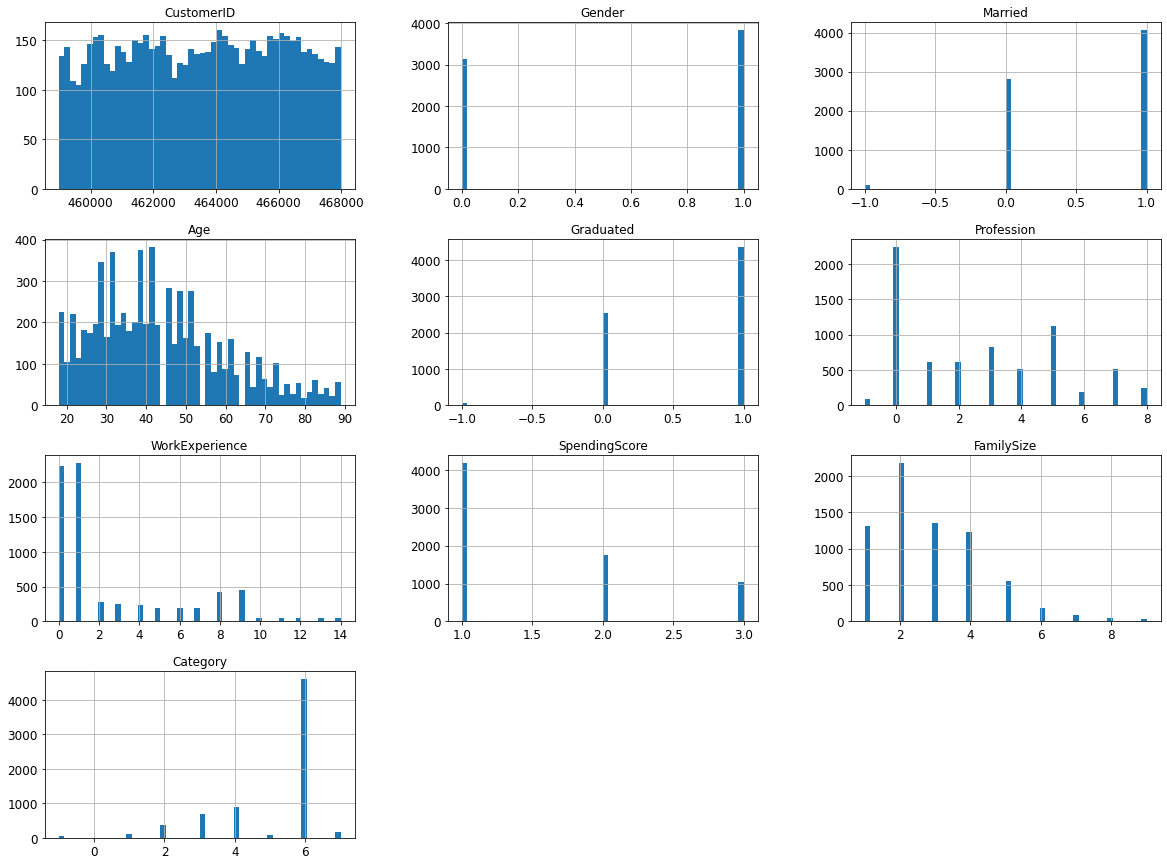

In [13]:
x_train_encoded.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
x_train_encoded["spending_score_per_family_size"] = x_train_encoded["SpendingScore"]/x_train_encoded["FamilySize"]
x_train_encoded["spending_score_per_Category"] = x_train_encoded["SpendingScore"]/x_train_encoded["Category"] 

In [31]:
x_train_encoded["spending_score_per_family_size"]

0      0 
2      1 
3      2 
5      1 
6      0 
       ..
8063   0 
8064   0 
8065   1 
8066   0 
8067   1 
Name: spending_score_per_family_size, Length: 6969, dtype: float64

In [34]:
corr_matrix = x_train_encoded.corr()
corr_matrix["Age"].sort_values(ascending=False)

Age                               1
Married                           1
spending_score_per_family_size    1
SpendingScore                     0
Graduated                         0
Category                          0
spending_score_per_Category       0
Profession                        0
Gender                            0
CustomerID                        0
WorkExperience                   -0
FamilySize                       -0
Name: Age, dtype: float64

array([[<AxesSubplot:xlabel='Graduated', ylabel='Graduated'>,
        <AxesSubplot:xlabel='Profession', ylabel='Graduated'>,
        <AxesSubplot:xlabel='SpendingScore', ylabel='Graduated'>,
        <AxesSubplot:xlabel='Age', ylabel='Graduated'>,
        <AxesSubplot:xlabel='FamilySize', ylabel='Graduated'>,
        <AxesSubplot:xlabel='Category', ylabel='Graduated'>],
       [<AxesSubplot:xlabel='Graduated', ylabel='Profession'>,
        <AxesSubplot:xlabel='Profession', ylabel='Profession'>,
        <AxesSubplot:xlabel='SpendingScore', ylabel='Profession'>,
        <AxesSubplot:xlabel='Age', ylabel='Profession'>,
        <AxesSubplot:xlabel='FamilySize', ylabel='Profession'>,
        <AxesSubplot:xlabel='Category', ylabel='Profession'>],
       [<AxesSubplot:xlabel='Graduated', ylabel='SpendingScore'>,
        <AxesSubplot:xlabel='Profession', ylabel='SpendingScore'>,
        <AxesSubplot:xlabel='SpendingScore', ylabel='SpendingScore'>,
        <AxesSubplot:xlabel='Age', ylabel='Spen

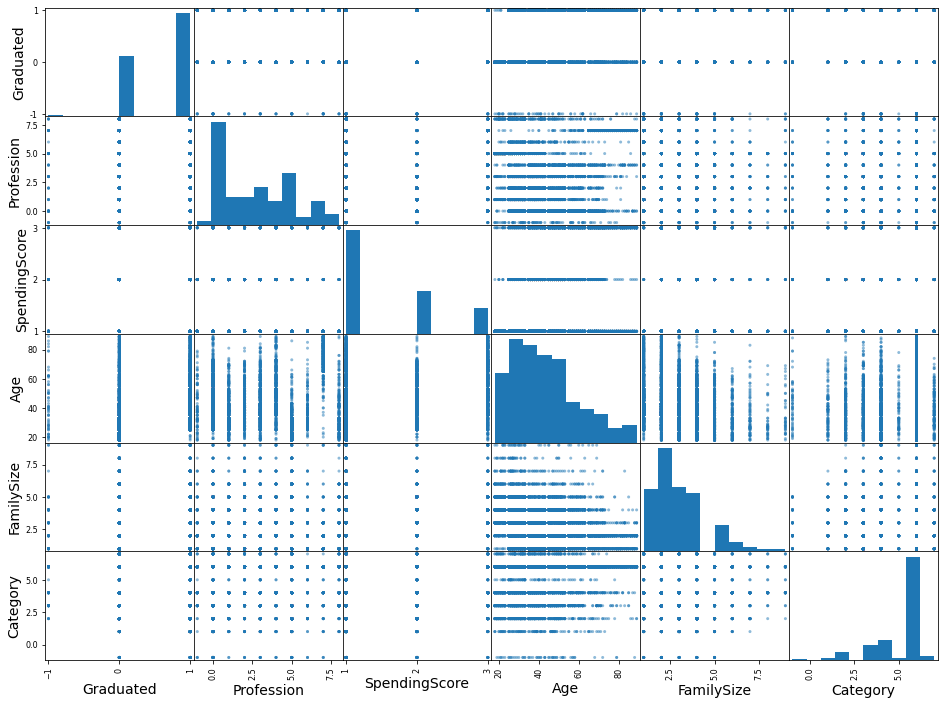

In [40]:
from pandas.plotting import scatter_matrix

attributes = ["Graduated","Profession","SpendingScore", "Age", "FamilySize" ,"Category"]
scatter_matrix(x_train_encoded[attributes], figsize=(16, 12))